# Setting up workspace

In [25]:
## options: https://github.com/microsoft/vscode-jupyter/wiki/Using-%25matplotlib-widget-instead-of-%25matplotlib-notebook,tk,etc
%matplotlib widget

# ## for online
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [26]:
## load modules
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import combinations

# Defining useful functions

In [27]:
def gyroid(x, y, z):
    return np.cos(x) * np.sin(y) + np.cos(y) * np.sin(z) + np.cos(z) * np.sin(x)

def getFlatNUniqueList(lol):
    return list(set([
        elem
        for inner_list in lol
        for elem in inner_list
    ]))

def genPointCloud(implicit_func=gyroid, res=100):
    ## define domain range
    xmin, xmax = -np.pi, np.pi
    ymin, ymax = -np.pi, np.pi
    zmin, zmax = -np.pi, np.pi
    ## generate a grid of points
    x_3d, y_3d, z_3d = np.meshgrid(
        np.linspace(xmin, xmax, res),
        np.linspace(ymin, ymax, res),
        np.linspace(zmin, zmax, res)
    )
    ## compute gyroid function at each point in domain
    F = implicit_func(x_3d, y_3d, z_3d)
    ## extract the gyroid isosurface
    verts, faces, normals, values = measure.marching_cubes(F, 0)
    ## return useful mesh information
    return verts, faces, normals

def genAdjDict(verts, faces):
    num_points = verts.shape[0]
    num_faces = faces.shape[0]
    ## initialise adjacency dictionary
    dict_adj = {}
    ## for each point store the list of point indices that are connected to it
    for point_index in range(num_points-1):
        dict_adj[point_index] = getFlatNUniqueList([
            [
                elem
                for elem in faces[face_index]
                if not (elem == point_index)
            ]
            for face_index in range(num_faces-1)
            if point_index in faces[face_index]
        ])
    ## return adjacency dictionary
    return dict_adj

def drawSurfaceMesh(ax, verts, faces):
    num_points = verts.shape[0]
    num_faces = faces.shape[0]
    ## draw points
    ax.plot(verts[:,0], verts[:,1], verts[:,2], color="black", marker=".", ms=1, ls="")
    ## draw conective mesh
    for face_index in range(num_faces-1):
        for comb_pair in list(combinations(faces[face_index], 2)):
            ax.plot(
                [ verts[comb_pair[0],0], verts[comb_pair[1],0] ],
                [ verts[comb_pair[0],1], verts[comb_pair[1],1] ],
                [ verts[comb_pair[0],2], verts[comb_pair[1],2] ],
                color="black", ls="-", lw=0.1
            )

def drawAdjPoints(ax, dict_adj, verts, point_index=0):
    ## draw point and its adjacent points
    adj_indices_grouped = dict_adj[point_index]
    ax.plot(verts[point_index,0], verts[point_index,1], verts[point_index,2], "r.")
    for adj_index in adj_indices_grouped:
        ax.plot(verts[adj_index,0], verts[adj_index,1], verts[adj_index,2], "b.")

# How to compute adjacency dictionary

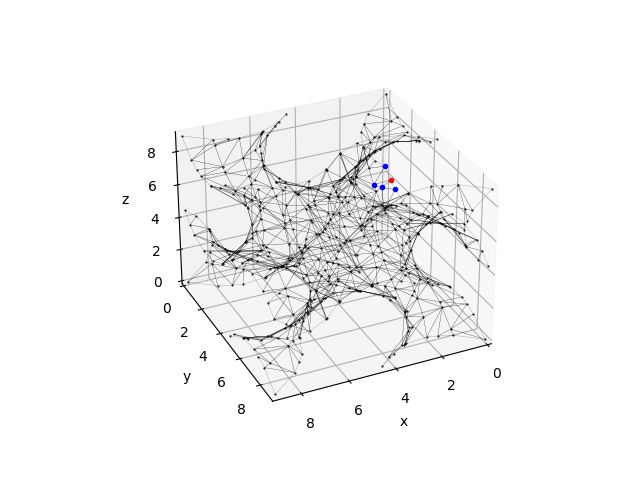

In [28]:
## how to compute 

## generate data
verts, faces, normals = genPointCloud(implicit_func=gyroid, res=10)
dict_adj = genAdjDict(verts, faces)

## create figure canvas and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
## draw data
drawSurfaceMesh(ax, verts, faces)
drawAdjPoints(ax, dict_adj, verts, point_index=0)
## label axes
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.set_zlim(0, 9)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
## show figure
ax.view_init(30, 65)
# fig.show()

# How to extrude from isosurface

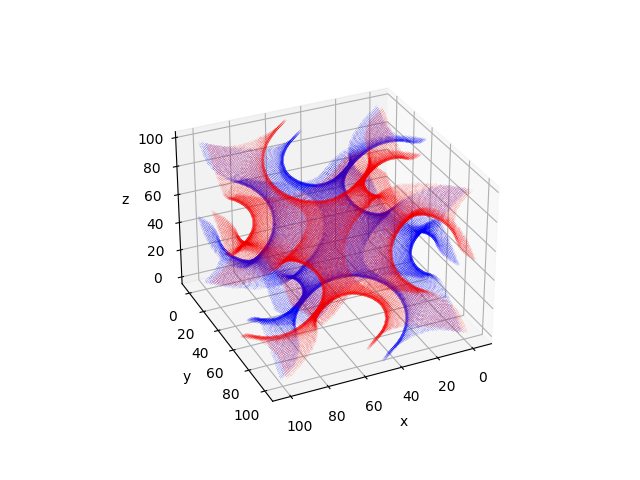

In [29]:
## generate data
verts, faces, normals = genPointCloud(implicit_func=gyroid, res=100)

## extract coordinates of point
x = verts[:,0]
y = verts[:,1]
z = verts[:,2]
## extrude the isosurface along its normal
offset = 5
## negative extrusion
x_lower = x - offset*normals[:,0]
y_lower = y - offset*normals[:,1]
z_lower = z - offset*normals[:,2]
## positive extrusion
x_upper = x + offset*normals[:,0]
y_upper = y + offset*normals[:,1]
z_upper = z + offset*normals[:,2]

## create figure canvas and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
## plot gyroid isosurfaces
ax.plot(x_lower, y_lower, z_lower, "b.", ms=0.1)
ax.plot(x_upper, y_upper, z_upper, "r.", ms=0.1)
## label axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
## show figure
ax.view_init(30, 65)
# fig.show()